In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
crime = pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA

In [3]:
crime.isnull().sum()#no null values 

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [4]:
crime[crime.duplicated()] #no duplicates

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [5]:
crime1=crime.iloc[:,1:]
crime1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
crime1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
crime1.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
crime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [9]:
#standardisation function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = pd.DataFrame(scaler.fit_transform(crime1.iloc[:,0:]),columns = ['Murder', 'Assault', 'UrbanPop', 'Rape'] )
scaled_crime_df

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [10]:
scaled_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     float64
 2   UrbanPop  50 non-null     float64
 3   Rape      50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [11]:
#elbow method

[200.0, 104.96163315756871, 80.08569526137276, 57.55425863091104, 50.05119672966492, 44.0921281550805, 40.675884795041114, 36.073709589324494, 31.61233134617762]


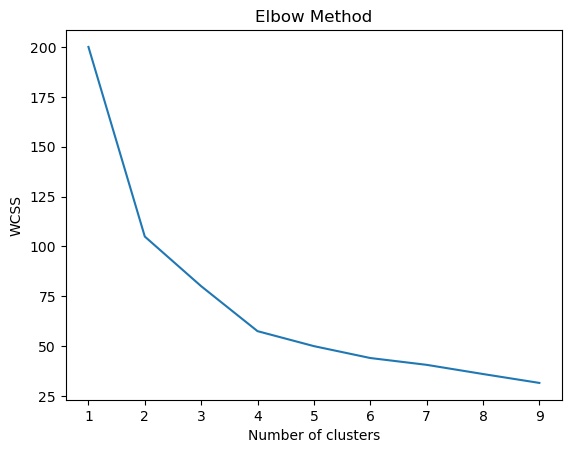

In [12]:
wcss = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [13]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=42)

In [14]:
clusters_new.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [15]:
set(clusters_new.labels_)

{0, 1, 2, 3}

In [16]:
crime1['cluster_new']=clusters_new.labels_
crime1

,Murder,Assault,UrbanPop,Rape,cluster_new
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,1


In [17]:
crime1.sort_values(by='cluster_new')

,Murder,Assault,UrbanPop,Rape,cluster_new
49,6.8,161,60,15.6,0
29,7.4,159,89,18.8,0
15,6.0,115,66,18.0,0
34,7.3,120,75,21.4,0
13,7.2,113,65,21.0,0
35,6.6,151,68,20.0,0
36,4.9,159,67,29.3,0
10,5.3,46,83,20.2,0
37,6.3,106,72,14.9,0
7,5.9,238,72,15.8,0


In [18]:
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [19]:
crime1.groupby('cluster_new').agg(['mean']).reset_index()

,cluster_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


In [20]:
crime1[crime1['cluster_new']==0]

,Murder,Assault,UrbanPop,Rape,cluster_new
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
10,5.3,46,83,20.2,0
13,7.2,113,65,21.0,0
15,6.0,115,66,18.0,0
20,4.4,149,85,16.3,0
29,7.4,159,89,18.8,0
34,7.3,120,75,21.4,0
35,6.6,151,68,20.0,0
36,4.9,159,67,29.3,0


In [21]:
crime1[crime1['cluster_new']==1]

,Murder,Assault,UrbanPop,Rape,cluster_new
0,13.2,236,58,21.2,1
3,8.8,190,50,19.5,1
9,17.4,211,60,25.8,1
17,15.4,249,66,22.2,1
23,16.1,259,44,17.1,1
32,13.0,337,45,16.1,1
39,14.4,279,48,22.5,1
41,13.2,188,59,26.9,1


In [22]:
crime1[crime1['cluster_new']==2]

,Murder,Assault,UrbanPop,Rape,cluster_new
11,2.6,120,54,14.2,2
14,2.2,56,57,11.3,2
16,9.7,109,52,16.3,2
18,2.1,83,51,7.8,2
22,2.7,72,66,14.9,2
25,6.0,109,53,16.4,2
26,4.3,102,62,16.5,2
28,2.1,57,56,9.5,2
33,0.8,45,44,7.3,2
40,3.8,86,45,12.8,2


In [23]:
crime1[crime1['cluster_new']==3]

,Murder,Assault,UrbanPop,Rape,cluster_new
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
8,15.4,335,80,31.9,3
12,10.4,249,83,24.0,3
19,11.3,300,67,27.8,3
21,12.1,255,74,35.1,3
24,9.0,178,70,28.2,3
27,12.2,252,81,46.0,3


In [24]:
#quality of cluster is expressed in terms of sillhoute score
from sklearn.metrics import silhouette_score
score =silhouette_score(scaled_crime_df, clusters_new.labels_ , metric='euclidean')
score

0.33968891433344395

# Hierarchical clustering

In [25]:
#importing hierarchy clustering libraries

In [26]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [27]:
crimes = pd.read_csv('crime_data.csv')
crimes

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [28]:
crimes = crimes.drop('Unnamed: 0',axis = 1)

In [29]:
crimes

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [30]:
crimes.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [31]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    print(x)
    return x

In [32]:
# Normalized data frame (considering the numerical part of data)
crimes_norm = norm_func(crimes)

      Murder   Assault  UrbanPop      Rape
0   0.746988  0.654110  0.440678  0.359173
1   0.554217  0.746575  0.271186  0.961240
2   0.439759  0.852740  0.813559  0.612403
3   0.481928  0.496575  0.305085  0.315245
4   0.493976  0.791096  1.000000  0.860465
5   0.427711  0.544521  0.779661  0.811370
6   0.150602  0.222603  0.762712  0.098191
7   0.307229  0.660959  0.677966  0.219638
8   0.879518  0.993151  0.813559  0.635659
9   1.000000  0.568493  0.474576  0.478036
10  0.271084  0.003425  0.864407  0.333333
11  0.108434  0.256849  0.372881  0.178295
12  0.578313  0.698630  0.864407  0.431525
13  0.385542  0.232877  0.559322  0.354005
14  0.084337  0.037671  0.423729  0.103359
15  0.313253  0.239726  0.576271  0.276486
16  0.536145  0.219178  0.338983  0.232558
17  0.879518  0.698630  0.576271  0.385013
18  0.078313  0.130137  0.322034  0.012920
19  0.632530  0.873288  0.593220  0.529716
20  0.216867  0.356164  0.898305  0.232558
21  0.680723  0.719178  0.711864  0.718346
22  0.11445

In [33]:
crimes_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


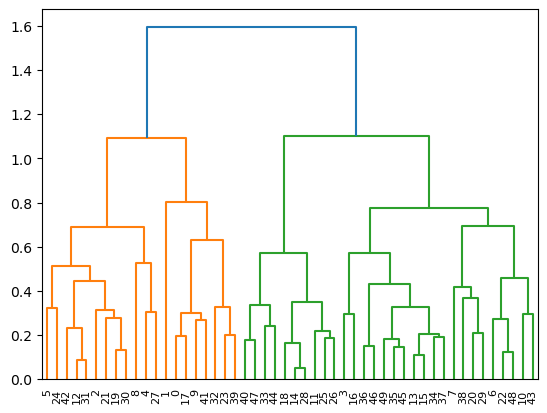

In [34]:
#create dendrogram
dendogram = sch.dendrogram(sch.linkage(crimes_norm, method = 'complete'))

In [35]:
#create cluster
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete',distance_threshold = None)
hc

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

In [36]:
# save clusters for chart
y_hc = hc.fit_predict(crimes_norm)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [37]:
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [38]:
set(y_hc)

{0, 1, 2}

In [39]:
crimes['hcluster'] = y_hc

In [40]:
crimes

,Murder,Assault,UrbanPop,Rape,hcluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [41]:
crimes = crimes.sort_values('hcluster')

In [42]:
crimes

,Murder,Assault,UrbanPop,Rape,hcluster
0,13.2,236,58,21.2,0
42,12.7,201,80,25.5,0
41,13.2,188,59,26.9,0
39,14.4,279,48,22.5,0
32,13.0,337,45,16.1,0
31,11.1,254,86,26.1,0
30,11.4,285,70,32.1,0
27,12.2,252,81,46.0,0
23,16.1,259,44,17.1,0
21,12.1,255,74,35.1,0


In [43]:
crimes.groupby('hcluster').mean()

,Murder,Assault,UrbanPop,Rape
hcluster,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


In [44]:
#quality of cluster is expressed in terms of sillhoute score
from sklearn.metrics import silhouette_score
score =silhouette_score(crimes_norm, clusters_new.labels_ , metric='euclidean')
score

0.3349095719865253

# DB Scan

In [45]:
#importing the libraries

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
crime_db = pd.read_csv('crime_data.csv')
crime_db

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [48]:
crime_db = crime_db.drop('Unnamed: 0',axis = 1)

In [49]:
crime_db

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [50]:
array = crime_db.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [51]:
stscaler = StandardScaler()#scalling converting data between 0 and 1 called normalisation
X = stscaler.fit_transform(array)

In [52]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

[[0.         0.78006247 0.84928467 0.92509451 1.14292205 1.29621831
  1.30273924 1.30290503 1.50105972 1.61563499 1.62065461]
 [0.         2.07898369 2.13697134 2.30088403 2.35013877 2.35997304
  2.36811895 2.56180471 2.59008583 2.72647204 2.72806129]
 [0.         1.0482199  1.08341076 1.09354181 1.20621365 1.22403776
  1.32378897 1.37888923 1.61207525 1.66155692 1.76715363]
 [0.         1.0013278  1.00722663 1.07057017 1.24148411 1.30290503
  1.436899   1.43992053 1.45972128 1.58779931 1.68872255]
 [0.         1.20897691 1.30069114 1.32378897 1.53005165 1.6957501
  1.81930503 1.93115604 2.04556279 2.19184473 2.2539111 ]
 [0.         1.24886253 1.30069114 1.32606825 1.37888923 1.41306145
  1.54876384 1.56244725 1.75396679 1.80796295 1.80800357]
 [0.         0.88100359 0.95643249 0.99437327 1.04597225 1.08653166
  1.22399673 1.24051012 1.29561222 1.39838355 1.45903108]
 [0.         1.19227586 1.27140067 1.42312615 1.45285466 1.56683387
  1.57429436 1.59692174 1.59993165 1.60562231 1.639

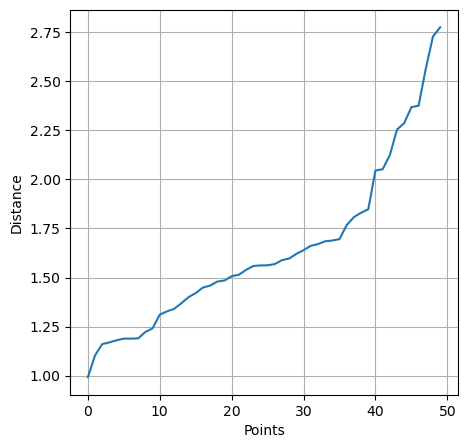

In [53]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)#index and nearest neighbours(11) distance values is obtained

distances, indices = neighbors.kneighbors(X)
print(distances)
# print(indices)
# print(distances.shape)
distances = np.sort(distances[:,10], axis=0)#sorting distances in ascending order,considering all rows(:) and 10th column(max value)
#print(distances)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

In [54]:
dbscan = DBSCAN(eps=1, min_samples=4)
clusters = dbscan.fit_predict(X)

In [55]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [56]:
set(clusters)

{-1, 0, 1}

In [57]:
crime_db['clusters'] = dbscan.labels_
crime_db

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [58]:
crime_db[crime_db['clusters'] == -1]

,Murder,Assault,UrbanPop,Rape,clusters
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
10,5.3,46,83,20.2,-1
12,10.4,249,83,24.0,-1


In [59]:
crime_db[crime_db['clusters']==0]

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
17,15.4,249,66,22.2,0
39,14.4,279,48,22.5,0
41,13.2,188,59,26.9,0


In [60]:
from sklearn.metrics import silhouette_score
score =silhouette_score(X, dbscan.labels_ , metric='euclidean')
score

0.2051154919322

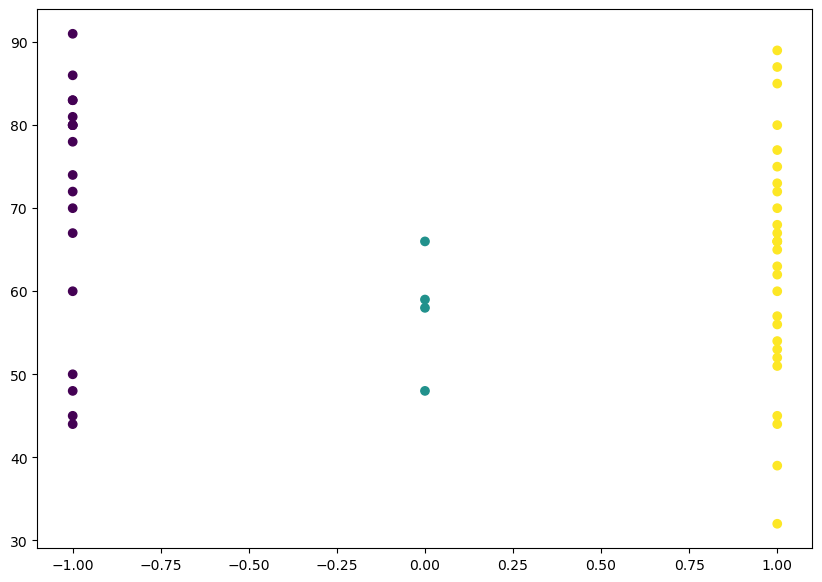

In [61]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime_db['clusters'],crime_db['UrbanPop'], c=dbscan.labels_) 

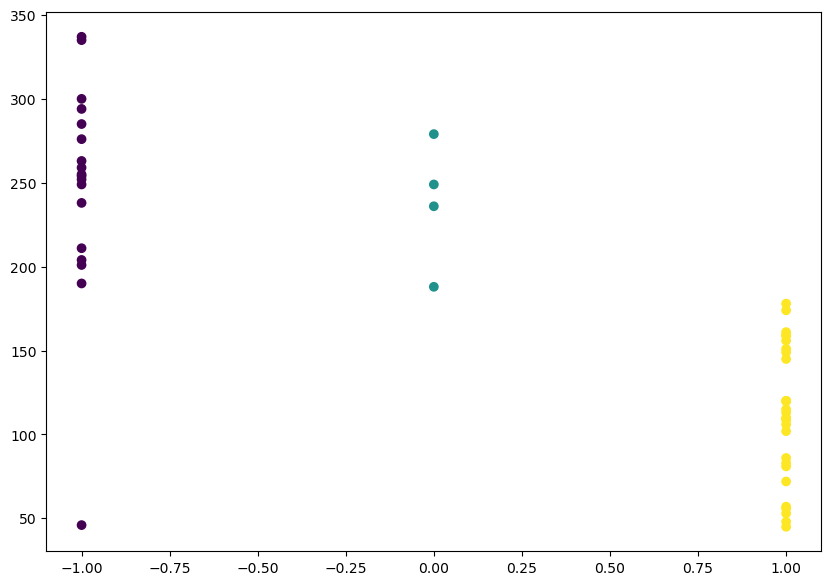

In [62]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime_db['clusters'],crime_db['Assault'], c=dbscan.labels_) 